In [1]:
from tdc.multi_pred import DTI
data = DTI(name = 'BindingDB_Kd')
# data = DTI(name = 'DAVIS')
# data = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


In [2]:
splited_data = data.get_split(method = 'random', seed = 42, frac = [0.78, 0.02, 0.2])

In [3]:
print("type(data): ",type(data))
print("type(splited_data): ",type(splited_data))
print("len(splited_data): ",len(splited_data))
# three data set
print("splited_data.keys(): ",splited_data.keys())

type(data):  <class 'tdc.multi_pred.dataloader.DTI'>
type(splited_data):  <class 'dict'>
len(splited_data):  3
splited_data.keys():  dict_keys(['train', 'valid', 'test'])


In [4]:
train = splited_data['train']
print(train.count())
train.head()

Drug_ID      40774
Drug         40774
Target_ID    37400
Target       40774
Y            40774
dtype: int64


,Drug_ID,Drug,Target_ID,Target,Y
0,444607.0,Cc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.46
1,4316.0,COc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.49
2,4293.0,NS(=O)(=O)c1ccc(S(=O)(=O)NCc2cccs2)s1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.83
3,1611.0,NS(=O)(=O)c1cc2c(s1)S(=O)(=O)N(Cc1cccs1)CC2O,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.20
4,4369102.0,CCN[C@H]1CN(CCOC)S(=O)(=O)c2sc(S(N)(=O)=O)cc21,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.32


In [5]:
train_selected = train[['Drug','Target']]
train_selected['Drug_vector'] = ''

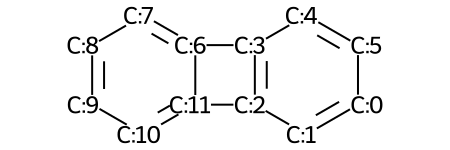

In [6]:
from rdkit import Chem
import numpy as np
m = Chem.MolFromSmiles('C1=CC2=C(C=C1)C1=CC=CC=C21')
def add_atom_index(mol):
    atoms = mol.GetNumAtoms()
    for i in range( atoms ):
        mol.GetAtomWithIdx(i).SetProp(
            'molAtomMapNumber', str(mol.GetAtomWithIdx(i).GetIdx()))
    return mol
add_atom_index(m)

In [7]:
from rdkit.Chem import AllChem
# use rdkit calculate ECFPs
for ind, drug in enumerate(train_selected['Drug']):
    mol = Chem.MolFromSmiles(drug)
    Morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2) #Explicitbitvects, which record whether or not a bit exists, are usually faster than SparseBitVects, but take up more memory, similar to fixed-length bit strings.
    intmap = map(int, Morgan_fp.ToBitString())
    train_selected['Drug_vector'][ind] = np.array(list(intmap))
train_selected

,Drug,Target,Drug_vector
0,Cc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,COc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NS(=O)(=O)c1ccc(S(=O)(=O)NCc2cccs2)s1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,NS(=O)(=O)c1cc2c(s1)S(=O)(=O)N(Cc1cccs1)CC2O,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,CCN[C@H]1CN(CCOC)S(=O)(=O)c2sc(S(N)(=O)=O)cc21,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...
40769,COc1cc(C(=O)O)ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40770,CC(C)(C)C[C@@H]1N[C@@H](C(=O)N[C@H]2CC[C@H](O)...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
40771,CC(C)[C@@H](CS(=O)(=O)C(C)C)N1C(=O)[C@@](C)(CC...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40772,CCCCCCCOC1OC(CO)C(O)C(O)C1O,MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLA...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [8]:
drug_vector = train_selected['Drug_vector']

In [9]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=drug_vector, shuffle=True, batch_size=256)
sample = next(iter(train_loader))

In [10]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average','complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=50)
    clustering.fit(sample)
    print("Final clusters: ", linkage, ": ")
    print( clustering.labels_)
    print()

Final clusters:  ward : 
[ 1  2  2 36  6 13 42 40  9  3 27  0 20 43  6 29 11  8 25  3  6  7 47  1
 25 47  1 33  3  1 42  9 12 27  2 25 10  1 16 11 38  0 28 32 10 46 35 49
 31 10  1 13 11  0 22 45 46 39  1 19 20 23 49  1 42 45  6 19  1 13 21 45
 20  2 41 21  1 22  1 32  1  9  0  2  2 43 35  9 11 10  2  1  7  1 25 17
 34  0  4 28  1  3  5 37 18 11  7 34 17  1  2 35 12  6 40 10 14  0  1  4
 14 14 47  1  2 13 31  2  1 30 24 11 11  0 44  3  1 12 44 33  1 28  8  9
 18 25 15 34 25 18 48  2 31 42 43 20 30  1 37  1 20 36 12 17  1 27 35 26
 15 28 11 49 25 16  0  2  8 20 21 22  2  5 26  2  4 26 14  2  9 32  1  0
 41  1 29  4 41 32  6  4  8 38 12 33  3 27  8 34 44 15 19  1  1 40  1 12
 14 35  1 42  6 23 49 41 38 14 10  6 22 15  2 21 37  1 36  2  8  2 12  2
 47 24  1  1  7 42  2  2 10  2 47 25 11 36 44 48]

Final clusters:  average : 
[ 0  0 34  3  0 13  7  0  0 14  6 27  0  0  0 23  2 17 18 46  0  0  8  0
 18  8  0  5 14  0  7  0 18  6  0 18 18  0 36  2  0  0  0 12  5  8 18  3
  0 18  0 13  2 48  